# Davide Vaccari
[dv2438]

## Explanatory Notebook for Projects in Machine Learning

This notebook will provide an overview of the projects contained in this repository.

* Analyzing World Happiness with Neural Networks (NN) [Link](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Analyzing%20World%20Happiness%20with%20NN/Vaccari_Davide_HW1.ipynb)

* Predicting Covid X-Rays with NN and Transfer Learning [Link](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Predicting%20Covid%20X-Rays%20with%20NN%20and%20Transfer%20Learning/Vaccari_Davide_HW2.ipynb)

* Covid Misinformation Hackathon [Link](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Covid%20Misinformation%20Hackathon/Vaccari_Davide_Covid_Tweet_Misinformation_Hackathon.ipynb)

___
# Analyzing World Happiness with Neural Networks (NN)

[This project](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Analyzing%20World%20Happiness%20with%20NN/Vaccari_Davide_HW1.ipynb) (link to the actual notebook) aims at predicting Country' Happiness levels ([United Nation's World Happiness Rankings](https://worldhappiness.report/)) through other external variables.  

These are:  

*   Country or region
*   GDP per capita
*   Social support
*   Healthy life expectancy
*   Freedom to make life choices
*   Generosity
*   Perceptions of corruption
* [Air quality](https://www.stateofglobalair.org/data/#/air/plot). [Hong Kong and Kosovo are the only two countries for which data is missing. For those, I've imputed the mean of the neighboring countries. Macedonia, Albania, Serbia, Montenegro, for Kosovo; China for Hong Kong.]

* [Population density](https://data.worldbank.org/indicator/EN.POP.DNST)

* [Suicide rates](https://apps.who.int/gho/data/node.main.MHSUICIDE?lang=en)

## Dataset

,Happiness_level,Happiness_level_code,Country,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,name,region,sub.region,Mean_Exposure_pm25,Gini_2017,Density,Suicide.rates.2016.
0,Very High,4,Finland,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Europe,Northern Europe,5.57,27.4,18.148547,15.9
1,Very High,4,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe,Northern Europe,9.79,28.7,137.976566,12.8
2,Very High,4,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe,Northern Europe,6.64,27.0,14.548292,12.2
3,Very High,4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Europe,Northern Europe,5.70,NaN,3.518414,14.0
4,Very High,4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,12.00,28.5,511.475928,12.6


**Note:** GINI information was discarded as it wasn't present for a sufficient number of Countries.

**Target feauture**: Happiness level code.

## Best Model
The most model was obtained from the following training:

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.07), bias_regularizer=l2(0.07)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

# save best model given maximum val_accuracy, stop early if loss does not improve after 200 further iterations beyond best loss
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(preprocessor(X_train), pd.get_dummies(y_train), batch_size=50,
          validation_data=(preprocessor(X_test), pd.get_dummies(y_test)), epochs=700, verbose=1, callbacks=[es,mc])

Overall, it provides these are the classification measurements for the best model:

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.673077,0.659399,0.694127,0.677121,0,0,0,0


___
# Predicting Covid X-Rays with NN and Transfer Learning

[The project](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Predicting%20Covid%20X-Rays%20with%20NN%20and%20Transfer%20Learning/Vaccari_Davide_HW2.ipynb) consisted in creating a model capable of identifying X-Ray images of individuals and dinstinguish them on whether they had COVID-19, Pneumonia by other causes, or they were healthy.

## Dataset

The best model came from a combination of **Convolutional Neural Networks**  helped by pre-trained parameters (**Transfer Learning**).

The **dataset** contains:  
Total RX: 3886  
Covid-19: 1200  
Normal: 1341  
Pneumonia: 1345

20% of these are used as test data. Respectively: COVID 240, NORMAL 269, PNEUMONIA 269.

The images in the dataset were preprocessed in order to fit the model. Each of them was rescaled to 192x192 pixels.  

In the following example, the first two (up) are X-Rays of individuals with Covid, the images below are X-Rays of healthy individuals.

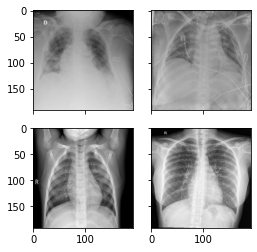

## Best model

The best model was trained adding three Dense layers (with 1024, 256, and 3 neurons respectively) to the [VGG19 Model](https://keras.io/api/applications/vgg/#vgg19-function) and its pre-trained parameters.

In [ ]:
base_model = VGG19(input_shape=(192,192,3),
                                               include_top=False, # Drops fully connected layers and output layer structure from pretrained model.
                                               weights='imagenet') # Using weight from model trained to 1000 categories of imagenet competition

In [ ]:
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu',
               kernel_initializer=tf.keras.initializers.glorot_uniform(), 
               bias_initializer=tf.keras.initializers.zeros())(flat1)
class2 = Dense(256, activation='relu',
               kernel_initializer=tf.keras.initializers.glorot_uniform(), 
               bias_initializer=tf.keras.initializers.zeros())(class1)
output = Dense(3, activation='softmax', 
               kernel_initializer=tf.keras.initializers.glorot_uniform(), 
               bias_initializer=tf.keras.initializers.zeros())(class2)

# define new model
model = Model(inputs=base_model.inputs, outputs=output) #base_model.inputs imports the vgg19 model defined in base_model
  
# summarize
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 192, 192, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 192, 192, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 192, 192, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 96, 96, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 96, 96, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 96, 96, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 48, 48, 128)       0  

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0) # dividing lr by half when val_accuracy fails to improve after 2 epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # save best model given maximum val_accuracy, stop early if loss does not improve after 10 epochs beyond best loss

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc']) 

model.fit(X_train, y_train,
          epochs = 30, verbose=1,validation_data=(X_test,y_test), callbacks=[mc,red_lr, es])

Overall this model did extremely well.

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.992288,0.992486,0.992412,0.992565,0,0,0,0


___
# Covid Misinformation Hackathon

[This project](https://github.com/davidev7/Machine_Learning_Projects/blob/main/Covid%20Misinformation%20Hackathon/Vaccari_Davide_Covid_Tweet_Misinformation_Hackathon.ipynb) consisted in creating a model capable of identifying whether a tweet contains truthful information or fake news. Moreover, the idea was to use **Recurrent Neural Networks** for sequential data (for text analysis). My best model had a **LSTM** layer in it.

## Citation
The dataset used in this report comes from the following paper:  

*Shahi, Gautam Kishore, Anne Dirkson, and Tim A. Majchrzak.*  
**"An exploratory study of covid-19 misinformation on twitter."**  
Online Social Networks and Media 22 (2021): 100104.

## Dataset

The dataset were tweets read and labelled by individual on whether they contained or not false information.

Here are a few examples:

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
6415,A tiger tested positive for COVID-19 please st...,fake
6416,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,_A post claims a COVID-19 vaccine has already ...,fake
6418,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


Example tweet with real news 1:  Survey people COVID-19 Colorado finds half reported close contact someone symptoms lab-confirmed COVID-19 14 days showing symptoms. If #COVID19 symptoms stay home avoid contact others.   
Example tweet with real news 2:  #coronavirus testing centre Kent shut reportedly make way lorry park run next big Brexit deadline 
Example tweet with real news 3:  “It’s individual responsibility assess risks ourselves.” Professor Karol Sikora says “should carry go” find right balance tackling spread #coronavirus. Get latest #COVID19:  


Example fake news 1:  Devastated stock brokers faces hands clearly not taking coronavirus precautions seriously #coronavirus #COVID19 #StockMarketCrash2020  
Example fake news 2:  Video Chinese Prime Minister Li Keqiang visiting mosque offering prayers seeking protection country coronavirus.
Example fake news 3:  An old man infected 300 people coronavirus Jaipur India tobacco smoke.


## Discussion
The training dataset contains 3360 tweets containing real information and 3060 tweets containing fake news.  

The plague of fake news has hit almost every possible social sector in the world; famously the American elections. However, during the coronavirus pandemic, fake news could have had even more serious effects, convincing people to directly risk their lives or those of their families. A model capable of autonomously selecting tweets containing fake news has proved to be a useful and important tool, such that Twitter itself, but also Facebook, have created models capable of interpreting the contents of posts containing information regarding the coronavirus pandemic and, possibly, censor them.

## (My) Best Model
The model I created that performed the best is a fairly simple model, composed of just three layers.


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

mc = ModelCheckpoint('best_model_3.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5, min_lr=0) # dividing lr by half when val_accuracy fails to improve after 2 epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2, callbacks=[mc, red_lr,es])

In [ ]:
accuracy = accuracy_score(y_test, labels_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, labels_pred, average=None)
print('Precision:', precision)
recall = recall_score(y_test, labels_pred, average=None)
print('Recall:', recall)
f1 = f1_score(y_test, labels_pred, average=None)
print('F1 score:', f1)

auc = roc_auc_score(y_test, labels_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.928505
Precision: [0.9172281  0.93914623]
Recall: [0.93431373 0.92321429]
F1 score: [0.92569208 0.93111211]
ROC AUC: 0.928764


### Application
Let's show a few applications of this model by letting it evaluating some tweets found online.

In [ ]:
tweet = "The CDC currently reports 99031 deaths. In general discrepancies death counts different sources small explicable. The death toll stands roughly 100000 people today."

tweet_stats(tweet)

Tweet: The CDC currently reports 99031 deaths. In general discrepancies death counts different sources small explicable. The death toll stands roughly 100000 people today.
Tweet chances: [[0.01990921 0.9800908 ]]
It's telling the truth


In [ ]:
tweet2 = "???Autopsies prove that COVID-19 is?? a blood chinese virus"

tweet_stats(tweet2)

Tweet: ???Autopsies prove that COVID-19 is?? a blood chinese virus
Tweet chances: [[9.9977428e-01 2.2568514e-04]]
99.97742772102356 % CHANCE OF BEING FAKE NEEEWS


In [ ]:
tweet_online = "#COVID: If they haven’t isolated the virus, how can they make a vaccine?"
tweet_stats(tweet_online)

Tweet: #COVID: If they haven’t isolated the virus, how can they make a vaccine?
Tweet chances: [[0.9540024  0.04599761]]
95.40023803710938 % CHANCE OF BEING FAKE NEEEWS


In [ ]:
tweet_online4 = "Frontline workers: We need more resources to deal with #COVID19"
tweet_stats(tweet_online4)

Tweet: Frontline workers: We need more resources to deal with #COVID19
Tweet chances: [[0.08119022 0.9188098 ]]
It's telling the truth
